In [107]:
#Import needed libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#Add this if you're using Jupyter Notebook


In [113]:
#I saved the excel files to the same folder as my jupyter notebook,
#this command uses pandas to create a data frame from the .xlsx.
application_train = pandas.read_excel("application_train.xlsx")

In [116]:
#This just prints out my data so that I can visually verify it pulled the information from the .xlsx file properly.
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#This converted all of the FLAG_OWN_REALTY Y or N answers to actual numbers so that they could be used later.
df = application_train.replace({'FLAG_OWN_REALTY':{'Y':1, 'N':0}})

In [125]:
#this just prints out my data so that I can visually verify that FLAG_OWN_REALTY was converted to numerical values.
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
#this creates a new data frame with my 10 chosen variables
newdf = df.filter(['TARGET', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

In [129]:
#this prints my new data frame so that I can visually verify that it contains all 10 variables.
newdf


,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,1,406597.5,24700.5,351000.0,-9461,-637,0.083037,0.262949,0.139376
1,0,0,1293502.5,35698.5,1129500.0,-16765,-1188,0.311267,0.622246,NaN
2,0,1,135000.0,6750.0,135000.0,-19046,-225,NaN,0.555912,0.729567
3,0,1,312682.5,29686.5,297000.0,-19005,-3039,NaN,0.650442,NaN
4,0,1,513000.0,21865.5,513000.0,-19932,-3038,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...
307506,0,0,254700.0,27558.0,225000.0,-9327,-236,0.145570,0.681632,NaN
307507,0,1,269550.0,12001.5,225000.0,-20775,365243,NaN,0.115992,NaN
307508,0,1,677664.0,29979.0,585000.0,-14966,-7921,0.744026,0.535722,0.218859
307509,1,1,370107.0,20205.0,319500.0,-11961,-4786,NaN,0.514163,0.661024


array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_REALTY'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

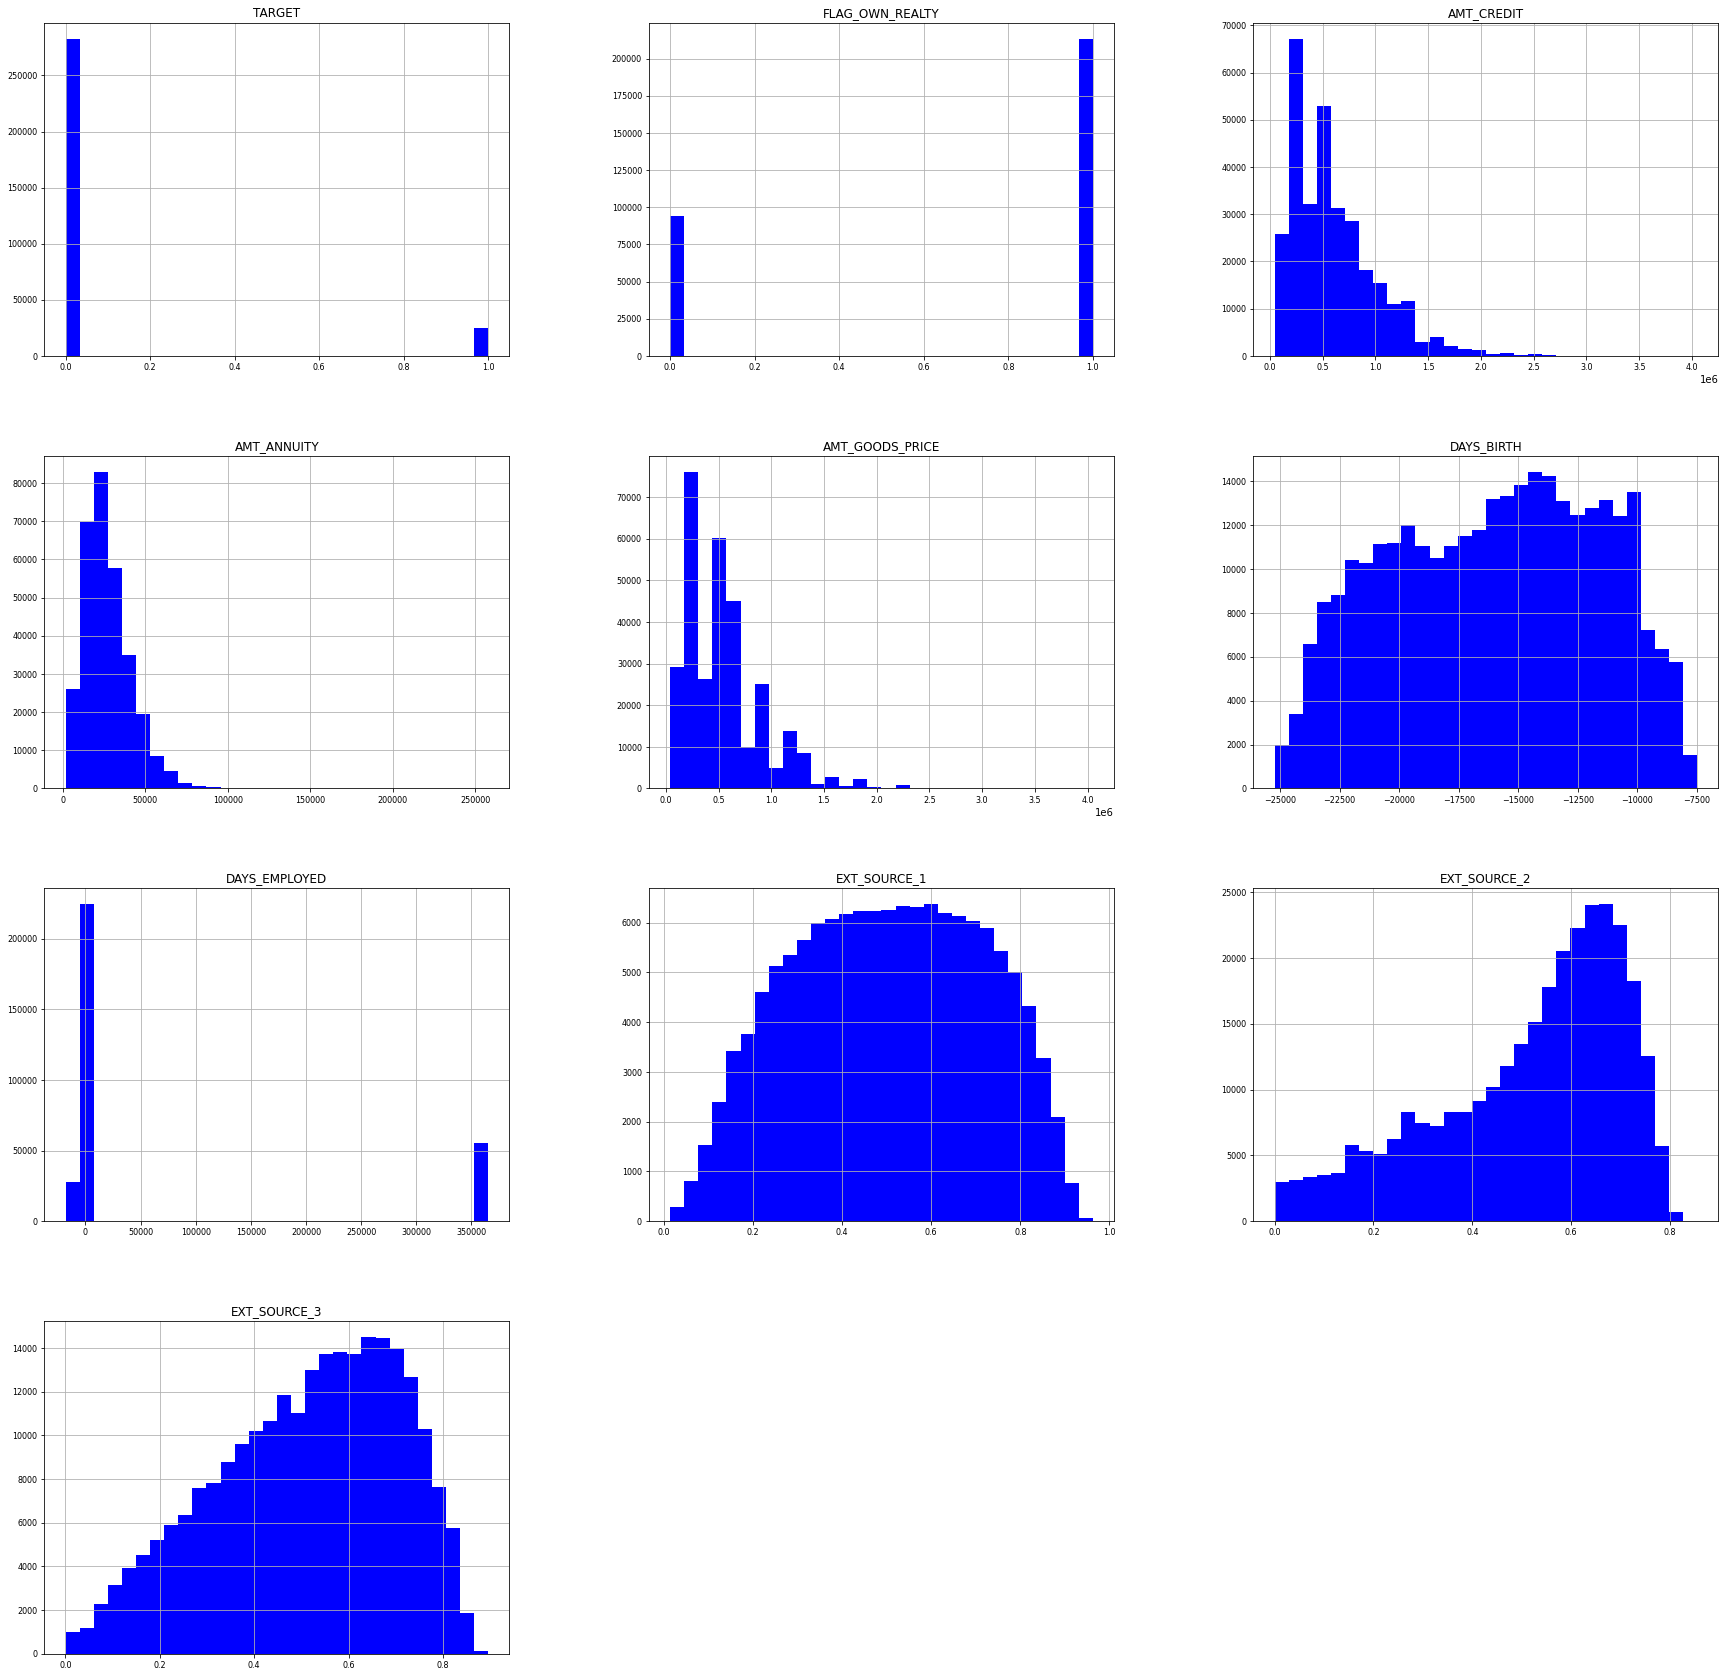

In [130]:
#this creates histograms for my 10 catagories. The code runs by selecting all columns that contain only real numbers.
#Then running .hist on these columns. (in this case that is all 10 of mine)
#I used this to quickly plot all of the data and then used the descriptions of each variable, along with
#their histograms to decide which to choose.

#VARIABLE CHOICE JUSTIFICATION:
#TARGET ---------- Represents client having difficulty making payments. This sounded like an obvious reason why someone
#                  should or should not get a loan. If there is difficulty then they shouldnt be approved.

#FLAG_OWN_REALTY - Owning property means that someone has been good enough with their money in the past to afford one
#                  and that they have the ability to take out money vs their house should they need to pay the loan back.

#AMT_CREDIT ------ If the loan amount is higher then justification for needing a larger one would need to be stronger.
#                  It would require more proof to get and effect if someone should be approved.

#AMT_ANNUITY ----- Annuity of a loan matters a lot because it is like pulling money you have already paid back out. If it is
#                  a large amount this would effect loan approval because more justification would be needed. Especially
#                  considering it is usually paid back in monthly installments. A higher amount would mean
#                  higher monthly payments and less likely to get approved.

#AMT_GOODS_PRICE - A higher priced object would mean more money would be needed to pay it back so a strong income would
#                  need to be shown, making it harder for someone with low income to get a loan.

#DAYS_BIRTH ------ In society, older people tend to have more money till a certain age. Being in the sweet spot could make it
#                  easier to get a loan.

#DAYS_EMPLOYED --- A long employment time ensures a steady stream of continued income for the borrower making them more
#                  trustworthy to give a loan to. It also shows a level of committment that would hopefully transfer to 
#                  also paying back the loan.

#EXT_SOURCE_1 ---- These 3 all share the same reasoning. External data sources to me sound like either referances or algorithms
#EXT_SOURCE_2 ---- based off other factors. After being in the MS AAI course I understand how powerful these can be. Since they
#EXT_SOURCE_3 ---- are given their own categories, I would assume they are important in determining a loan approval. When I 
#                  graphed their histograms they also gave me a nice bell curve which also signaled they may be significant.

num_features = newdf.select_dtypes(include = ['float64', 'int64']).columns
newdf[num_features].hist(figsize=(30, 30), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

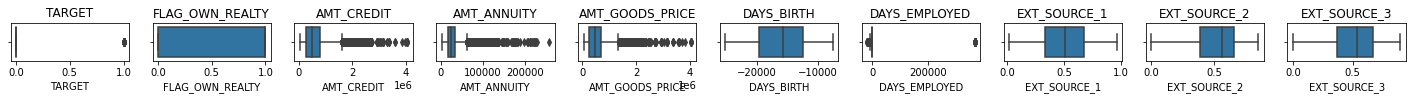

In [146]:
#this creates box plots of all my 
plt.figure(figsize=(25, 25))
for i, col in enumerate(newdf):
    plt.subplot(30, 10, i+1)
    sns.boxplot(data=newdf, x=col)
    plt.title(col)

In [154]:
df1 = newdf.corr()
df1

,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.006148,-0.030369,-0.012817,-0.039645,0.078239,-0.044932,-0.155317,-0.160472,-0.178919
FLAG_OWN_REALTY,-0.006148,1.000000,-0.039270,-0.005225,-0.045537,-0.119146,0.069677,0.080234,0.002576,0.040281
AMT_CREDIT,-0.030369,-0.039270,1.000000,0.770138,0.986968,-0.055436,-0.066838,0.168429,0.131228,0.043516
AMT_ANNUITY,-0.012817,-0.005225,0.770138,1.000000,0.775109,0.009445,-0.104332,0.119398,0.125804,0.030752
AMT_GOODS_PRICE,-0.039645,-0.045537,0.986968,0.775109,1.000000,-0.053442,-0.064842,0.175502,0.139367,0.047717
DAYS_BIRTH,0.078239,-0.119146,-0.055436,0.009445,-0.053442,1.000000,-0.615864,-0.600610,-0.091996,-0.205478
DAYS_EMPLOYED,-0.044932,0.069677,-0.066838,-0.104332,-0.064842,-0.615864,1.000000,0.289848,-0.020767,0.113434
EXT_SOURCE_1,-0.155317,0.080234,0.168429,0.119398,0.175502,-0.600610,0.289848,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.002576,0.131228,0.125804,0.139367,-0.091996,-0.020767,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.040281,0.043516,0.030752,0.047717,-0.205478,0.113434,0.186846,0.109167,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

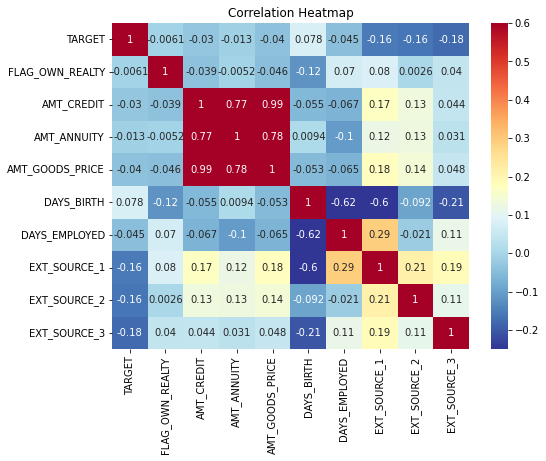

In [156]:
#This plots a heat map of the correlation between variables. The middle red section with numbers closer to one indicate
#more correlation.
plt.figure(figsize=(8, 6))
sns.heatmap(df1, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')